In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder , LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("bank-additional.csv", sep=';')

print("Initial Data Shape and Info\n")
print(f"Shape of the dataset: {df.shape}")
print("\nFirst 5 rows of the dataset:")
df.head()

Initial Data Shape and Info

Shape of the dataset: (4119, 21)

First 5 rows of the dataset:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
# checking for missing values
print("Missing Values Check\n")
missing_values = df.isnull().sum()
print(missing_values)

Missing Values Check

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [5]:
# Label encode target variable
df['y'] = df['y'].map({'no': 0, 'yes': 1})

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [7]:
numerical_features = [
    'age', 'duration', 'campaign', 'pdays', 'previous',
    'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'
]

binary_ordinal_features = [
    'default', 'housing', 'loan'
]
categorical_features = ['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome']
target = 'y'

In [8]:
# Label encode binary/ordinal features
label_encoder = LabelEncoder()
for col in binary_ordinal_features:
    df[col] = label_encoder.fit_transform(df[col])

In [9]:
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df[numerical_features].head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,-0.980752,0.903952,-0.209228,0.201031,-0.351356,-1.206054,-1.185448,-1.240939,-1.331707,-0.914779
1,-0.107991,0.350300,0.569634,0.201031,-0.351356,0.649441,0.715193,0.892269,0.711698,0.332862
2,-1.465619,-0.116966,-0.598660,0.201031,-0.351356,0.841389,1.528273,-0.283172,0.773427,0.836535
3,-0.204965,-0.941553,0.180203,0.201031,-0.351356,0.841389,1.528273,-0.283172,0.771697,0.836535
4,0.667795,-0.780563,-0.598660,0.201031,-0.351356,-0.118350,-0.655478,-0.326707,0.328632,0.398028


In [10]:
# one hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [11]:
bool_cols = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

In [12]:
df_encoded.head()

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,-0.980752,0,2,0,0.903952,-0.209228,0.201031,-0.351356,-1.206054,-1.185448,-1.240939,-1.331707,-0.914779,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,-0.107991,0,0,0,0.350300,0.569634,0.201031,-0.351356,0.649441,0.715193,0.892269,0.711698,0.332862,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,-1.465619,0,2,0,-0.116966,-0.598660,0.201031,-0.351356,0.841389,1.528273,-0.283172,0.773427,0.836535,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
3,-0.204965,0,1,1,-0.941553,0.180203,0.201031,-0.351356,0.841389,1.528273,-0.283172,0.771697,0.836535,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,0.667795,0,2,0,-0.780563,-0.598660,0.201031,-0.351356,-0.118350,-0.655478,-0.326707,0.328632,0.398028,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0


In [13]:
chi2_features = [col for col in df_encoded.columns if col not in numerical_features + binary_ordinal_features and col != target]
chi2_features

['job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'contact_telephone',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'poutcome_nonexistent',
 'poutcome_success']

In [14]:

chi2_features = [col for col in df_encoded.columns if col not in numerical_features + binary_ordinal_features and col != target]

X_chi2 = df_encoded[chi2_features]
y_chi2 = df_encoded[target]

k_best = 10
selector = SelectKBest(chi2, k=k_best)
selector.fit(X_chi2.abs(), y_chi2) 


selected_chi2_features = X_chi2.columns[selector.get_support()]

In [15]:
selected_chi2_features

Index(['job_blue-collar', 'job_retired', 'contact_telephone', 'month_dec',
       'month_mar', 'month_may', 'month_oct', 'month_sep',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [16]:
final_features = numerical_features + binary_ordinal_features + list(selected_chi2_features)
data_encoded = df_encoded[final_features + [target]]
data_encoded.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,default,housing,loan,job_blue-collar,job_retired,contact_telephone,month_dec,month_mar,month_may,month_oct,month_sep,poutcome_nonexistent,poutcome_success,y
0,-0.980752,0.903952,-0.209228,0.201031,-0.351356,-1.206054,-1.185448,-1.240939,-1.331707,-0.914779,0,2,0,1,0,0,0,0,1,0,0,1,0,0
1,-0.107991,0.350300,0.569634,0.201031,-0.351356,0.649441,0.715193,0.892269,0.711698,0.332862,0,0,0,0,0,1,0,0,1,0,0,1,0,0
2,-1.465619,-0.116966,-0.598660,0.201031,-0.351356,0.841389,1.528273,-0.283172,0.773427,0.836535,0,2,0,0,0,1,0,0,0,0,0,1,0,0
3,-0.204965,-0.941553,0.180203,0.201031,-0.351356,0.841389,1.528273,-0.283172,0.771697,0.836535,0,1,1,0,0,1,0,0,0,0,0,1,0,0
4,0.667795,-0.780563,-0.598660,0.201031,-0.351356,-0.118350,-0.655478,-0.326707,0.328632,0.398028,0,2,0,0,0,0,0,0,0,0,0,1,0,0


In [17]:
# data for PCA
X_pca = data_encoded[numerical_features]

# PCA
pca = PCA(n_components=0.95) 
X_pca_reduced = pca.fit_transform(X_pca)

pca_cols = [f'PC_{i+1}' for i in range(pca.n_components_)]
df_pca = pd.DataFrame(X_pca_reduced, columns=pca_cols)

df_final = data_encoded.drop(columns=numerical_features)
df_final = pd.concat([df_final.reset_index(drop=True), df_pca], axis=1)

df_final.head()

,default,housing,loan,job_blue-collar,job_retired,contact_telephone,month_dec,month_mar,month_may,month_oct,month_sep,poutcome_nonexistent,poutcome_success,y,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7
0,0,2,0,1,0,0,0,0,1,0,0,1,0,0,-2.093133,1.695556,0.101033,1.116351,0.030480,0.578085,-0.130414
1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1.380696,-0.504383,0.063522,-0.143007,0.045654,0.768589,0.430298
2,0,2,0,0,0,1,0,0,0,0,0,1,0,0,1.808099,0.032193,-0.575430,1.275872,-1.167405,-0.349116,0.538744
3,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1.897078,-0.209538,-0.871515,0.135760,-0.096738,-0.869226,0.493419
4,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0.121697,0.545876,0.326800,-0.732684,-0.117117,-0.936347,-0.691806


In [18]:
# -------------------------------
#Data Visualization part
# -------------------------------

# data visualization here

In [19]:
pip install seaborn


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Dataset shape: (4119, 21)
Target distribution:
y
0    3668
1     451
Name: count, dtype: int64


/var/folders/cg/blqmhqbj7g306htdy3lrlmjr0000gn/T/ipykernel_9778/1788952108.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=df_final, palette='coolwarm')


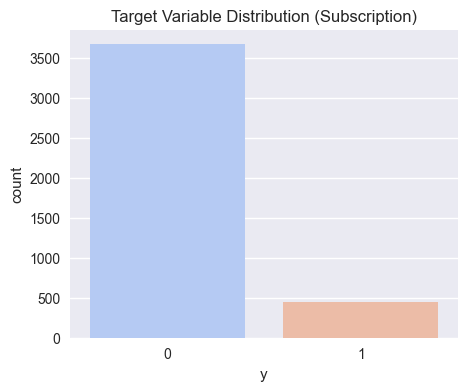

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")

print("Dataset shape:", df_final.shape)
print("Target distribution:")
print(df_final['y'].value_counts())

plt.figure(figsize=(5,4))
sns.countplot(x='y', data=df_final, palette='coolwarm')
plt.title("Target Variable Distribution (Subscription)")
plt.show()

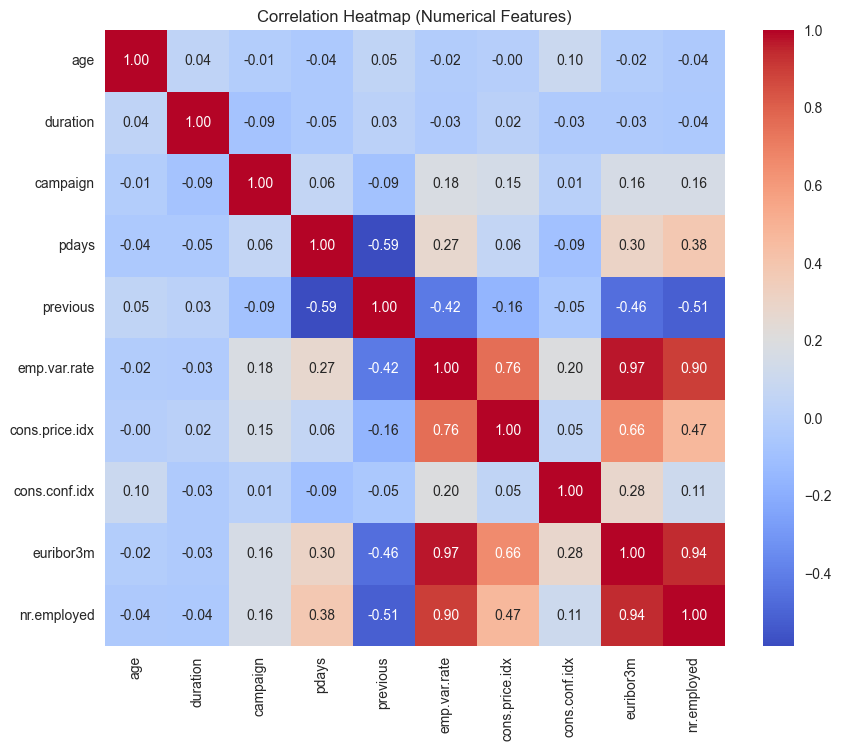

In [21]:
plt.figure(figsize=(10,8))
corr = df[numerical_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

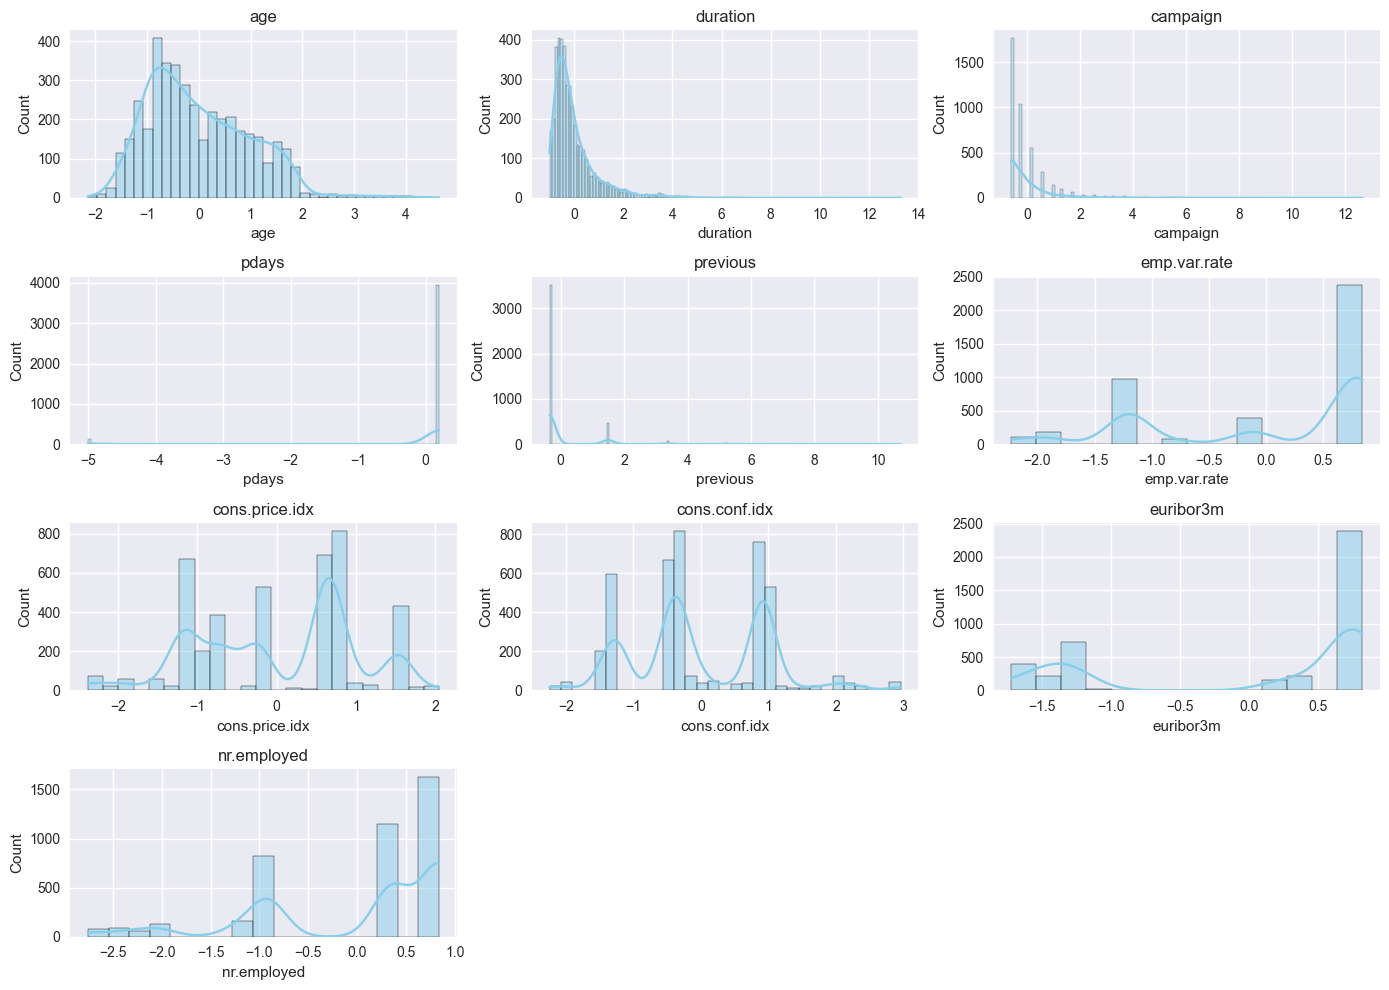

In [22]:
df_scaled = df[numerical_features]

plt.figure(figsize=(14,10))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df_scaled[col], kde=True, color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()

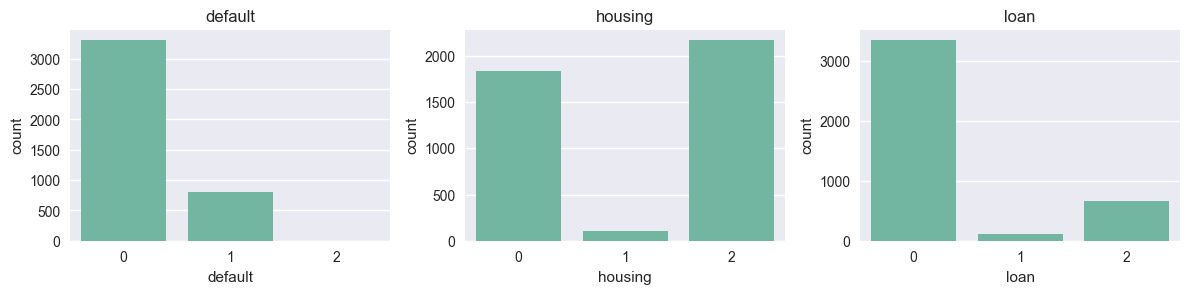

In [23]:
plt.figure(figsize=(12,8))
for i, col in enumerate(binary_ordinal_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, data=df)
    plt.title(col)
plt.tight_layout()
plt.show()

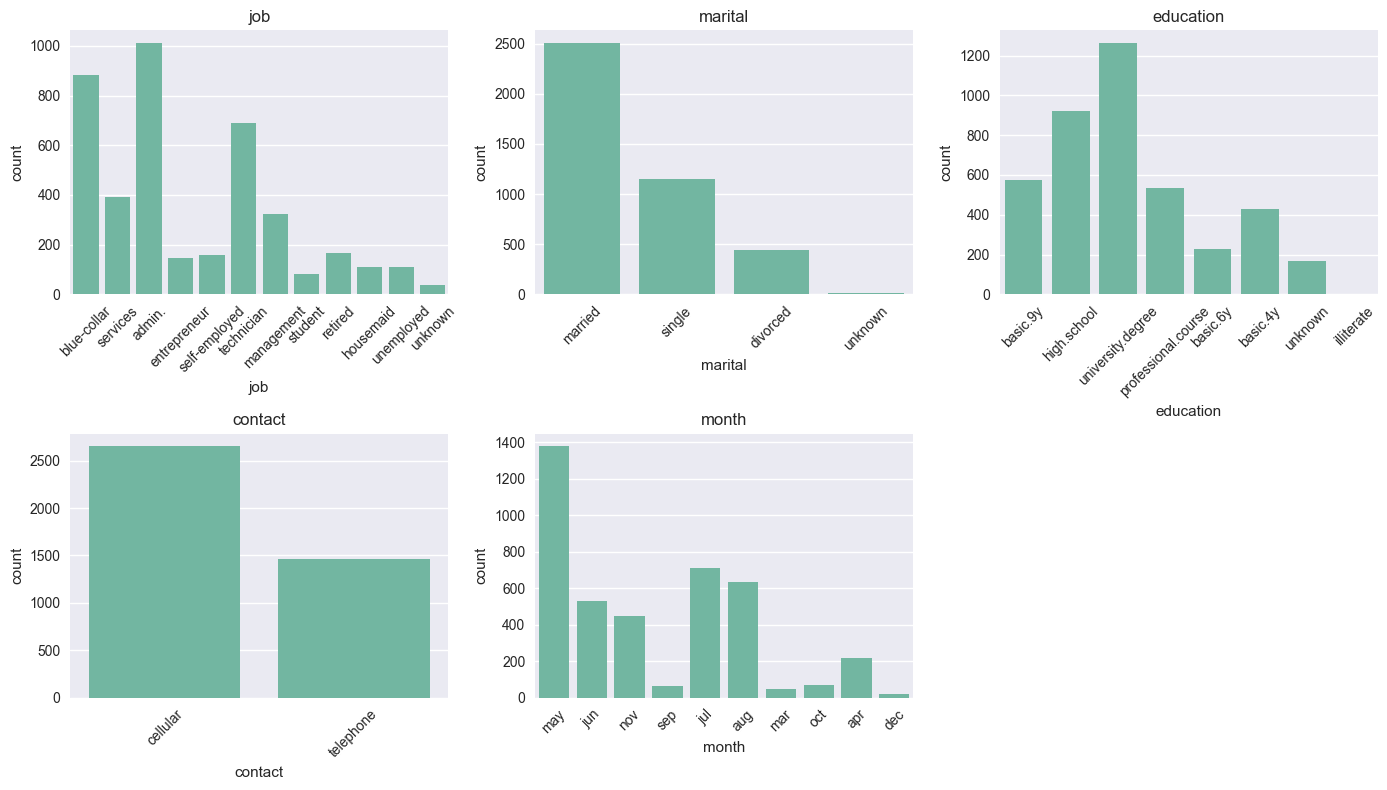

In [24]:
plt.figure(figsize=(14,8))
for i, col in enumerate(categorical_features[:5], 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, data=df)
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/cg/blqmhqbj7g306htdy3lrlmjr0000gn/T/ipykernel_9778/2748549250.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[f'PC{i+1}' for i in range(len(explained_var))], y=explained_var, palette='viridis')


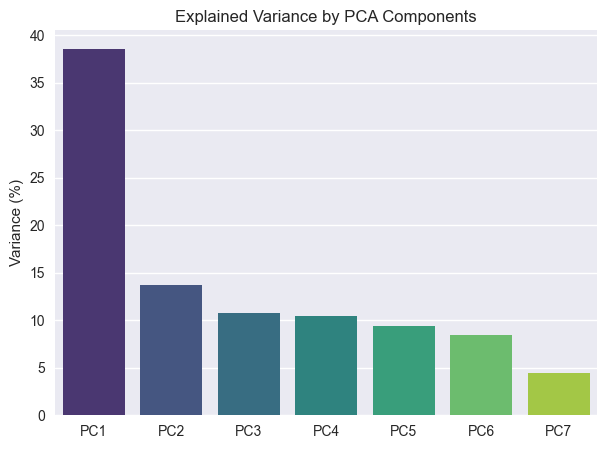

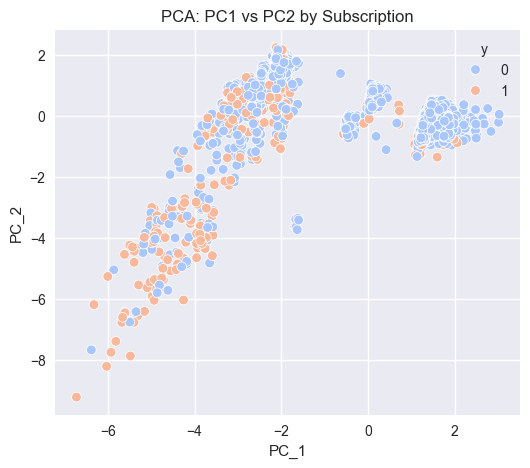

In [25]:
plt.figure(figsize=(7,5))
explained_var = pca.explained_variance_ratio_ * 100
sns.barplot(x=[f'PC{i+1}' for i in range(len(explained_var))], y=explained_var, palette='viridis')
plt.title("Explained Variance by PCA Components")
plt.ylabel("Variance (%)")
plt.show()

# Scatterplot of first two PCs colored by target
plt.figure(figsize=(6,5))
sns.scatterplot(
    x='PC_1', y='PC_2', 
    hue='y', 
    data=pd.concat([df_pca, df_encoded['y'].reset_index(drop=True)], axis=1),
    palette='coolwarm'
)
plt.title("PCA: PC1 vs PC2 by Subscription")
plt.show()

/var/folders/cg/blqmhqbj7g306htdy3lrlmjr0000gn/T/ipykernel_9778/1339012984.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=selected_chi2_features, x=selector.scores_[selector.get_support()], palette='mako')


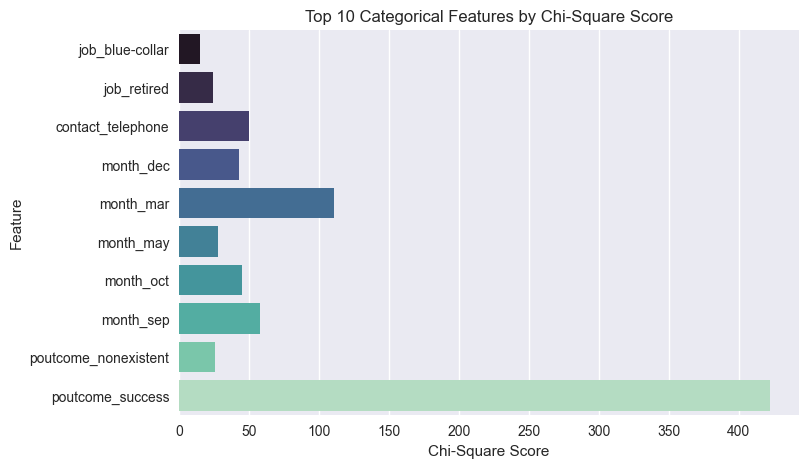

In [26]:
plt.figure(figsize=(8,5))
sns.barplot(y=selected_chi2_features, x=selector.scores_[selector.get_support()], palette='mako')
plt.title("Top 10 Categorical Features by Chi-Square Score")
plt.xlabel("Chi-Square Score")
plt.ylabel("Feature")
plt.show()

# Model training

In [27]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
X = df_final.drop('y', axis=1)
y = df_final['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)
pred_lr_class = (pred_lr > 0.5).astype(int)
acc_lr = accuracy_score(y_test, pred_lr_class)
prec_lr = precision_score(y_test, pred_lr_class)
rec_lr = recall_score(y_test, pred_lr_class)
f1_lr = f1_score(y_test, pred_lr_class)
cm_lr = confusion_matrix(y_test, pred_lr_class)

# Logistic Regression
logr = LogisticRegression(max_iter=1000)
logr.fit(X_train, y_train)
pred_log = logr.predict(X_test)
acc_log = accuracy_score(y_test, pred_log)
prec_log = precision_score(y_test, pred_log)
rec_log = recall_score(y_test, pred_log)
f1_log = f1_score(y_test, pred_log)
cm_log = confusion_matrix(y_test, pred_log)

# K Means (clustering, evaluated as classification)
km = KMeans(n_clusters=2, random_state=42)
km.fit(X_train)
pred_km = km.predict(X_test)
acc_km = accuracy_score(y_test, pred_km)
if acc_km < 0.5:
    pred_km = 1 - pred_km
    acc_km = accuracy_score(y_test, pred_km)
prec_km = precision_score(y_test, pred_km)
rec_km = recall_score(y_test, pred_km)
f1_km = f1_score(y_test, pred_km)
cm_km = confusion_matrix(y_test, pred_km)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, pred_rf)
prec_rf = precision_score(y_test, pred_rf)
rec_rf = recall_score(y_test, pred_rf)
f1_rf = f1_score(y_test, pred_rf)
cm_rf = confusion_matrix(y_test, pred_rf)

data = {
    'Model': ['Linear Regression', 'Logistic Regression', 'K Means', 'Random Forest'],
    'Accuracy': [acc_lr, acc_log, acc_km, acc_rf],
    'Precision': [prec_lr, prec_log, prec_km, prec_rf],
    'Recall': [rec_lr, rec_log, rec_km, rec_rf],
    'F1 Score': [f1_lr, f1_log, f1_km, f1_rf],
    'Confusion-Matrix': [cm_lr, cm_log, cm_km, cm_rf]
}
df_metrics = pd.DataFrame(data)

In [30]:
df_metrics

,Model,Accuracy,Precision,Recall,F1 Score,Confusion-Matrix
0,Linear Regression,0.902913,0.642857,0.293478,0.402985,"[[717, 15], [65, 27]]"
1,Logistic Regression,0.906553,0.622951,0.413043,0.496732,"[[709, 23], [54, 38]]"
2,K Means,0.722087,0.241509,0.695652,0.358543,"[[531, 201], [28, 64]]"
3,Random Forest,0.898058,0.562500,0.391304,0.461538,"[[704, 28], [56, 36]]"


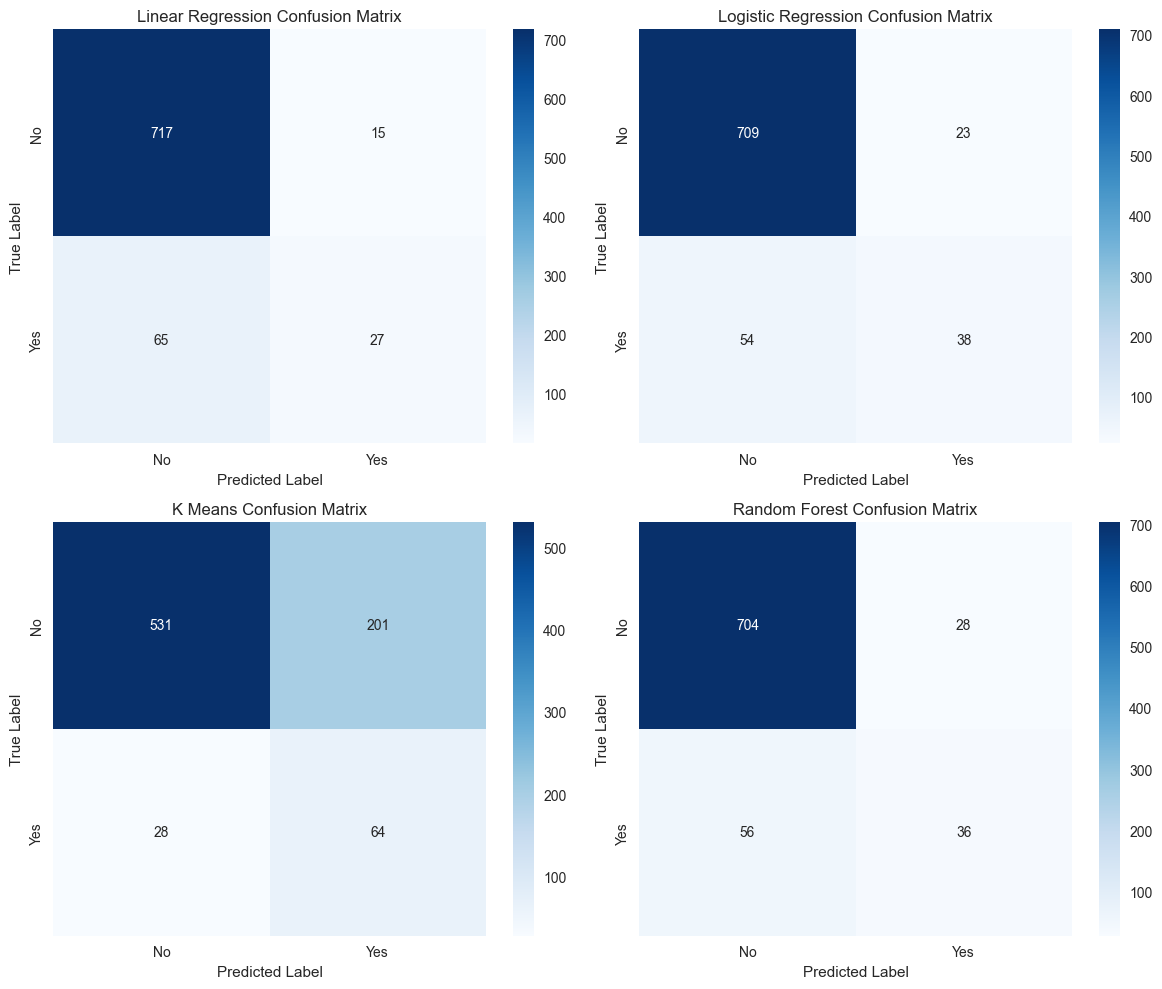

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

# Models list
models = ['Linear Regression', 'Logistic Regression', 'K Means', 'Random Forest']

# Plot each confusion matrix
for i, (model, cm) in enumerate(zip(models, [cm_lr, cm_log, cm_km, cm_rf])):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{model} Confusion Matrix')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')
    axes[i].set_xticklabels(['No', 'Yes'])
    axes[i].set_yticklabels(['No', 'Yes'])

plt.tight_layout()
plt.show()

# Association rule mining

In [32]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth, association_rules

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Only use truly binary columns (0, 1) - exclude default, housing, loan as they have 3 values
binary_cols = ['y'] + [col for col in df_final.columns if col.startswith('job_') or col.startswith('marital_') or col.startswith('education_') or col.startswith('contact_') or col.startswith('month_') or col.startswith('day_of_week_') or col.startswith('poutcome_')]
df_binary = df_final[binary_cols]

# Ensure all values are 0 or 1
df_binary = df_binary.astype(int)

# FP-Growth to find frequent itemsets
frequent_itemsets = fpgrowth(df_binary, min_support=0.1, use_colnames=True)

#association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
print("Association Rules:")

Association Rules:


/Users/kamruzzamankhanalve/Documents/4-1 semester/CSE 4119 DM/4120 codes/project/.venv/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [33]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(month_may),(poutcome_nonexistent),0.334547,0.855305,0.284292,0.849782,0.993543,1.0,-0.001848,0.963237,-0.009671,0.313941,-0.038166,0.591085
1,"(contact_telephone, month_may)",(poutcome_nonexistent),0.194465,0.855305,0.191551,0.985019,1.151658,1.0,0.025225,9.658412,0.163477,0.223197,0.896463,0.604488
2,(job_blue-collar),(poutcome_nonexistent),0.214615,0.855305,0.187424,0.873303,1.021043,1.0,0.003863,1.142059,0.026241,0.212380,0.124389,0.546217
3,(contact_telephone),(poutcome_nonexistent),0.356154,0.855305,0.346929,0.974097,1.138889,1.0,0.042308,5.586001,0.189410,0.401292,0.820981,0.689859


In [34]:
# k Fold
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression


X = df_final.drop('y', axis=1)
y = df_final['y']

kf = KFold(n_splits=5, shuffle=True, random_state=42)
logr = LogisticRegression(max_iter=1000)

metrics = {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1': []}
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    logr.fit(X_train, y_train)
    pred = logr.predict(X_test)
    
    metrics['Accuracy'].append(accuracy_score(y_test, pred))
    metrics['Precision'].append(precision_score(y_test, pred))
    metrics['Recall'].append(recall_score(y_test, pred))
    metrics['F1'].append(f1_score(y_test, pred))

# Average metrics across folds
avg_metrics = {k: np.mean(v) for k, v in metrics.items()}
print("\nK-fold Cross-Validation Metrics (Logistic Regression):")
for metric, value in avg_metrics.items():
    print(f"{metric}: {value:.4f}")


K-fold Cross-Validation Metrics (Logistic Regression):
Accuracy: 0.9136
Precision: 0.6619
Recall: 0.4203
F1: 0.5131
